## K-means

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import os

from pathlib               import Path
from sklearn.cluster       import KMeans
from sklearn.pipeline      import make_pipeline

# method to scale the data
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [9]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


## o Stock movements dataset
cluster companies via their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day) from `2010` to `2015` obtained from *Yahoo! Finance*, where each row corresponds to a company, and each column corresponds to a trading day. Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

In [10]:
path_dataset = path_root / 'dataset/company-stock-movements-2010-2015-incl.csv'
data      = pd.read_csv(path_dataset, index_col = 0) 
movements = data.values
data.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


### Train 

In [11]:
# Create a normalizer: normalizer
normalizer = Normalizer()      # Option 1
#normalizer = StandardScaler() # Option 2
# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)
# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

### Predict

In [12]:
# Check Which companies moves togheter
labels    = pipeline.predict(movements)

In [13]:
# print cluster
companies = data.index
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})
# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
59       0                               Yahoo
2        0                              Amazon
17       0                     Google/Alphabet
45       1                                Sony
35       1                            Navistar
34       1                          Mitsubishi
48       1                              Toyota
58       1                               Xerox
21       1                               Honda
15       1                                Ford
22       1                                  HP
7        1                               Canon
55       2                         Wells Fargo
1        2                                 AIG
3        2                    American express
16       2                   General Electrics
5        2                     Bank of America
18       2                       Goldman Sachs
26       2                      JPMorgan Chase
41       3                       Philip Morris
57       3   

## o Grain dataset 
- **A**: area; 
- **P**: perimeter; 
- $C = \frac{4 \pi A}{P^{2}}$ : compactness; 
- **L1**: length of kernel; 
- **W**:  width of kernel, 
- **AC**: asymmetry coefficient 
- **L2**: length of kernel groove. 
- **y** : wine category

In [15]:
path_dataset = path_root / 'dataset/grains/seeds.csv'
data = pd.read_csv(path_dataset, 
                     header = None,
                     names  = ['A', 'P', 'C', 'L1', 'W', 'AC', 'L2', 'y'])
X    = data.drop('y', axis=1).values
y    = data['y'].values
data.head()

,A,P,C,L1,W,AC,L2,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Cluster inertias 

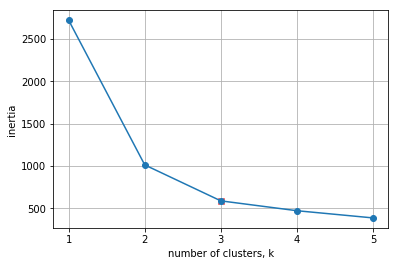

In [16]:
ks = range(1, 6)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(X)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.scatter(ks[2], inertias[2], c='r', marker = 'x')
plt.plot(ks, inertias, '-o')
plt.grid()
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Evaluate Cluster 

In [18]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)
# Create a DataFrame with clusters and varieties as columns: df
varieties = data['y'].copy()
varieties[varieties == 1] = 'Canadian wheat'    
varieties[varieties == 2] = 'Kama wheat'
varieties[varieties == 3] = 'Rosa wheat'

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      60          10           2
1                       1          60           0
2                       9           0          68
